# 4. Aggregations: Min, Max, and Everything In Between

## 4-1. Summing the Values in an Array

In [1]:
import numpy as np

In [19]:
np.random.seed(0)
L = np.random.random(100)
sum(L)

47.27938395125176

In [20]:
np.sum(L)

47.279383951251766

In [21]:
big_array = np.random.rand(10000)
%timeit sum(big_array)
%timeit np.sum(big_array)

1.9 ms ± 41 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
8.74 µs ± 246 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


## 4-2. Minimum and Maximum

In [23]:
min(big_array), max(big_array)

(7.2449638492178e-05, 0.9999779517807228)

In [24]:
np.min(big_array), np.max(big_array)

(7.2449638492178e-05, 0.9999779517807228)

In [25]:
%timeit min(big_array)
%timeit np.min(big_array)

1.06 ms ± 54.8 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
6.27 µs ± 30.9 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [26]:
print(big_array.min(), big_array.max(), big_array.sum())

7.2449638492178e-05 0.9999779517807228 4966.9236452877385


### 4-2-1. Multi dimensional aggregates

In [27]:
M = np.random.random((3, 4))
print(M)

[[0.57767884 0.57882926 0.54533474 0.18446811]
 [0.56863317 0.09138901 0.68264187 0.05145717]
 [0.18915112 0.2942178  0.27893122 0.81210229]]


In [28]:
M.sum()

4.854834588353747

In [29]:
M.min(axis=0)

array([0.18915112, 0.09138901, 0.27893122, 0.05145717])

In [30]:
M.max(axis=1)

array([0.57882926, 0.68264187, 0.81210229])

## 4-3. Example

In [3]:
import numpy as np
import pandas as pd
import requests
from bs4 import BeautifulSoup

In [4]:
# 데이터 크롤링

url = "https://github.com/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/data/president_heights.csv"
response = requests.get(url)
soup = BeautifulSoup(response.text, 'lxml')

soup_sub = soup.select("th")
columns = [i.get_text().strip() for i in soup_sub]

soup_sub = soup.select("td")
data = [i.get_text().strip() for i in soup_sub]

data = np.array(data)
data = data[data != ""]
nrow = int(data.shape[0]/3)
data = data.reshape((nrow, 3))
data = pd.DataFrame(data, columns=columns)
data['height(cm)'] = pd.to_numeric(data['height(cm)'])
data.head()

order               name  height(cm)
0     1  George Washington         189
1     2         John Adams         170
2     3   Thomas Jefferson         189
3     4      James Madison         163
4     5       James Monroe         183

In [5]:
heights = np.array(data['height(cm)'])
print(heights)

[189 170 189 163 183 171 185 168 173 183 173 173 175 178 183 193 178 173
 174 183 183 168 170 178 182 180 183 178 182 188 175 179 183 193 182 183
 177 185 188 188 182 185]


In [6]:
print("Mean height: ", heights.mean())
print("Standard deviation: ", heights.std())
print("Minimum height: ", heights.min())
print("Maximum height: ", heights.max())

Mean height:  179.73809523809524
Standard deviation:  6.931843442745892
Minimum height:  163
Maximum height:  193


In [7]:
print("25th percentile: ", np.percentile(heights, 25))
print("Median: ", np.median(heights))
print("75 percentile: ", np.percentile(heights, 75))

25th percentile:  174.25
Median:  182.0
75 percentile:  183.0


In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()

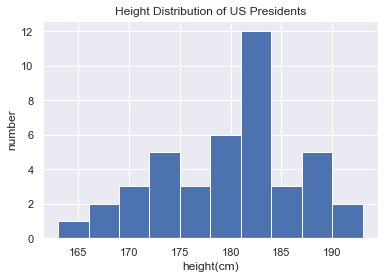

In [11]:
plt.hist(heights)
plt.title('Height Distribution of US Presidents')
plt.xlabel('height(cm)')
plt.ylabel('number');